In [1]:
# SUPERVISED MACHINE LEARNING

# CLASSIFICATION -- Logistic Regression

# Forth Project

In [2]:
# WORKING OF SIGMOID FUNCTION

import numpy as np
from sklearn.linear_model import LogisticRegression
# Step 2: Create the dataset
X = np.array([[1], [2], [3], [4], [5], [6]]) # hours studied  --> INDEPENDENT VARIABLE
y = np.array([0, 0, 0, 1, 1, 1]) # passed or not              --> DEPENDENT VARIABLE
# Step 3: Create and train the model
model = LogisticRegression()
model.fit(X, y)

# LOGISTIC REGRESSION PROVIDES YOU A PROBABBILITY
# HOW LOGISTIC REGRESSION CALCULATES THIS PROBABBILITY

LogisticRegression()

In [3]:
# calculation SIGMOID behind the scenes

# Step 4: Get the learned parameters

a = model.coef_[0][0] # slope
b = model.intercept_[0] # intercept
print(f"a (slope): {a}")
print(f"b (intercept): {b}")
# a = 1.12 means the model thinks “hours studied” strongly affects the chance of passing.
# If we had a = 0.2, the effect would be much weaker.
# b = -3.9 means a student who studies very few hours has a very low chance of passing.

a (slope): 1.1206952510393666
b (intercept): -3.9223038967769632


In [4]:
# calculation SIGMOID behind the scenes

# LET'S CALCULATE THIS SCORE
# score = a * x + b

# THE SCORE IF STUDENT IS GOING TO STUDY 5.5 HOURS IN A DAY?
# a --> 1.1207
# b --> -3.9223
# x --> 3.5

score = 1.1207 * 5.5 + -3.9223
print(score)

2.24155


In [5]:
# calculation SIGMOID behind the scenes

# Let's Calculate e raise to the power of score

import math
res = math.e ** -score
print(res)

0.10629362151469593


In [6]:
# calculation SIGMOID behind the scenes

# Sigmoid Function

1/(1 + res)

0.9039191590301654

In [7]:
# 1. Import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
# 2. load the dataset
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [9]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# 2. select IV and DV

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
x = data.drop('Outcome',axis=1)   # axis = 1 means column      --> used this code if 100% sure all column become IV except last column
x = x.values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [13]:
y = data.Outcome.values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [14]:
# 3. Split the dataset

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
# 4. Create a Model

log_reg = LogisticRegression(max_iter=200)    # max_iter = increase no. ITERATIONS to avoid warning base on record
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [16]:
# Logistic regression provides probability

y_prob = log_reg.predict_proba(x_test)[:,1]
y_prob

array([0.27587171, 0.18844086, 0.11448808, 0.16354446, 0.47152763,
       0.44181565, 0.01545949, 0.66077894, 0.54146137, 0.77733211,
       0.25591838, 0.89734144, 0.3362008 , 0.30303447, 0.08198096,
       0.38092464, 0.13935392, 0.07479528, 0.86674191, 0.56143057,
       0.20841338, 0.07739483, 0.53962428, 0.0945844 , 0.5394989 ,
       0.88554595, 0.12431327, 0.03016297, 0.25152958, 0.11581437,
       0.91112978, 0.87075938, 0.76536041, 0.83753319, 0.61668745,
       0.68328935, 0.96813003, 0.24363738, 0.51147551, 0.73613825,
       0.06983479, 0.59412645, 0.58366935, 0.32718599, 0.02759122,
       0.50239275, 0.6393479 , 0.22533799, 0.36056256, 0.95629563,
       0.04889599, 0.66096112, 0.8116769 , 0.24552928, 0.09325806,
       0.04152087, 0.7781665 , 0.0057039 , 0.40861817, 0.75696165,
       0.74134846, 0.35194245, 0.19236789, 0.20492144, 0.07688254,
       0.62716494, 0.0509161 , 0.7328617 , 0.03691982, 0.71593403,
       0.67523613, 0.07016495, 0.18115143, 0.11430304, 0.09115

In [17]:
# Predicted Outcome

y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [18]:
# Actual Outcome

y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [31]:
# Create Table to compare
# actual_values   probabilities   predicted_outcome

table = pd.DataFrame({'Actual_Values':y_test,'Probabilities':y_prob,'Predicted_Outcome':y_pred})
table.head(20)

,Actual_Values,Probabilities,Predicted_Outcome
0,0,0.275872,0
1,0,0.188441,0
2,0,0.114488,0
3,0,0.163544,0
4,0,0.471528,0
5,0,0.441816,0
6,0,0.015459,0
7,0,0.660779,1
8,0,0.541461,1
9,0,0.777332,1


In [20]:
# CONFUSION MATRIX
# IS USED TO EVALUATE THE MODEL PERFORMANCE OF A CLASSIFICATION ALGORITHM
# IT WILL TELL YOU HOW MANY TIMES YOUR ML MODEL MAKES GOOD PREDICTIONS
# HOW MANY TIMES YOUR ML MODEL MAKES BAD PREDICTIONS

# IT WILL COMPARE ACTUAL VS PREDICTED
# AND RESULT WILL BE SHOWN TO TOU IN A FORM OF MATRIX

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)

#                                       Actual_Yes      Actual_No
#                 Predicted Yes           TP = 78         FN = 21
#                 Predicted No            FP = 18         TN = 37

[[78 21]
 [18 37]]


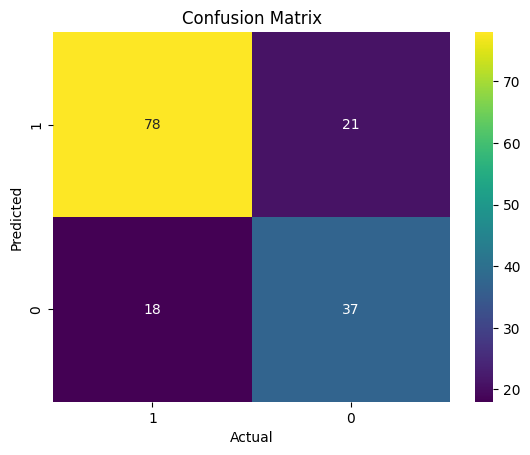

In [21]:
sns.heatmap(cm,annot=True,cmap='viridis',xticklabels=[1,0],yticklabels=[1,0])  # --> chg x,y tick labels only for confusion matrix
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Accuracy overall model
# Accuracy = TP + TN / TP + FN + FP + TN
# 75%

# Precision (Trust)
# when my model is saying someone has diabetes, how much you can trust on ML Model
# imagine your model said 10 people have diabetes
# but in reality only 8 ot them truly do
# Precision = TP / TP + FP
# 81%

# Recall (Sensitivity): of all tha actual diabetes, how many did the model actually correctly indentify?
# Recall = TP / TP + FN
# 79%
# example
# actual dataset 100 were diabetic
# out of 100 / your ml model correctly identified how many ? --> 78

In [23]:
print('Classification Report\n')              # Classification Report ONLY CAN GENERATE AFTER CONFUSION MATRIX
print(classification_report(y_test,y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [34]:
# Final Code Take User Input

print("Enter Patient Details:")

pregnancies = float(input("Pregnancies: "))
glucose = float(input("Glucose Level: "))
blood_pressure = float(input("Blood Pressure: "))
skin_thickness = float(input("Skin Thickness: "))
insulin = float(input("Insulin Level: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes Pedigree Function: "))
age = float(input("Age: "))

# Convert input into model format

user_input = np.array([[pregnancies, glucose, blood_pressure,
                        skin_thickness, insulin, bmi, dpf, age]])

# Predict Diabetes

prediction = log_reg.predict(user_input)
probability = log_reg.predict_proba(user_input)[:, 1]

# Show Result

print("\n--- Diabetes Prediction Result ---")
if prediction[0] == 1:
    print("Result: Diabetic")
else:
    print("Result: Not Diabetic")

print(f"Probability of Diabetes: {probability[0]:.2f}")


Enter Patient Details:
Pregnancies: 6
Glucose Level: 148
Blood Pressure: 72
Skin Thickness: 35
Insulin Level: 0
BMI: 33.6
Diabetes Pedigree Function: 0.627
Age: 50

--- Diabetes Prediction Result ---
Result: Diabetic
Probability of Diabetes: 0.77
